
<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# K-means Clustering


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn's k-means clustering to cluster data
* Apply k-means clustering on a real world data for Customer segmentation


## Introduction

**K-means** is vastly used for clustering in many data science applications. It is especially useful if you need to quickly discover insights from **unlabeled data**.

Real-world applications of k-means include:
- Customer segmentation
- Understanding what website visitors are trying to accomplish
- Pattern recognition
- Feature engineering 
- Data compression


### Install libraries
Ensure the required libraries are available.


In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 174.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 167.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 153.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 910.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.4 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 151.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 191.7 MB/s eta 0:00:0000:01


Now import the required libraries.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h1 id="random_generated_dataset">K-Means on a synthetic data set</h1>

Let's create our own dataset for this lab!


First, we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [3]:
np.random.seed(0)

Next, we will be making random clusters of points by using the `make_blobs` class. The `make_blobs` class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b> centres </b>: The number of centres to generate, or the fixed centre locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.


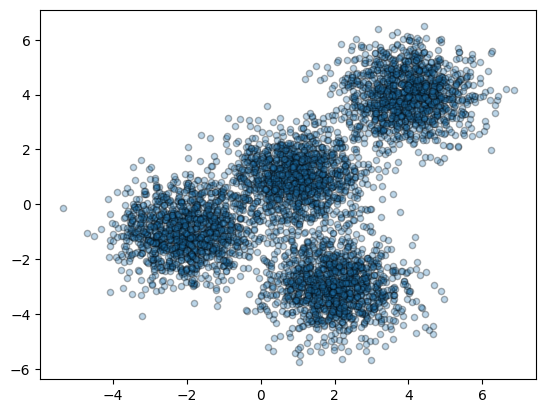

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

<h2 id="setting_up_K_means">Setting up k-means</h2>
Now that we have our random data, let's set up our k-means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

- `init`: Initialization method of the centroids.
  - Value will be: `k-means++` 
  - `k-means++`: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence.
- `n_clusters`: The number of clusters to form as well as the number of centroids to generate. 
  -  Value will be: 4 (since we have 4 centres) 
- `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. 
   - Value will be: 12  


Initialize `KMeans` with these parameters, where the output variable is called `k_means`.


In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the `KMeans` model with the feature matrix we created above, <b> X </b>.


In [7]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's get the label for each point in the model using the `k_means.labels_` attribute and save them as `k_means_labels`.


In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

We will also get the coordinates of the cluster centers using `k_means.cluster_centers_` and save it as `k_means_cluster_centers`.


In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

Now that we have the random data generated and the k-means model initialized, let's plot the result and see what it looks like!


Please read through the code and comments to understand how to plot the model.


In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


### Exercise 1
Try to cluster the above dataset into a different number of clusters, say k=3. Note the difference in the pattern generated.


In [ ]:
# write your code here


<details><summary>Click here for the solution</summary>

```python
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

```

</details>


### Exercise 2
Try the same with k=5.


In [ ]:
# your code here

<details><summary>Click here for the solution</summary>

```python
k_means3 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

```

</details>


### Exercise 3
Comment on the within-cluster sum of squares, i.e. inertia, of the clusters created for k=3 and k=5. 


<details><summary>Click here for the solution</summary>
For k=3, the value of within-cluster sum of squares will be higher that that for k=4, since the points from different natural clusters are being grouped together, leading to underfitting of the k-means model. For k=5, the value of will be lesser than that for k=4, since the points are distributed into mode clusters than needed, leading to over-fitting of the k-means model.
</details>


<h1 id="customer_segmentation_K_means">Customer Segmentation with k-means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation to this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, or more likely to purchase products, or subscribe to a service. A business task is to retain those customers.


### Load data from CSV file  
Let's use pandas to read the dataset from the cloud storage.


In [ ]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

<h2 id="pre_processing">Pre-processing</h2


As you can see, `Address` in this dataset is a categorical variable. The k-means algorithm doesn't work directly with categorical variables because the Euclidean distance function isn't meaningful for them. You could one-hot encode the categorical feature, but for illustration purposes let's run k-means clustering without it.


In [ ]:
cust_df = cust_df.drop('Address', axis=1)

In [ ]:
# Drop NaNs from the dataframe
cust_df = cust_df.dropna()
cust_df.info()

After dropping NaNs we still have 700 rows out of the original 849. Let's proceed with this smaller data set.


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally, tranforming the features so they have zero mean and standard deviation of one. We use `StandardScaler()` to normalize, or standardize our dataset.


In [ ]:
X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

<h2 id="modeling">Modeling</h2>


Let's apply k-means to the data set. 


### Exercise 4
Write the code to cluster the data with k=3. Extract the cluster labels for this clustering process.


In [ ]:
# your code here.
clusterNum = 3
k_means = KMeans(...)
k_means.fit(X)
labels = k_means.labels_

<details><summary>Click here for the solution</summary>

```python
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
```

</details>


<h2 id="insights">Insights</h2>

We assign the k-means cluster labels to each row in the dataframe.


In [ ]:
cust_df["Clus_km"] = labels

We can easily check the centroid values by averaging the features in each cluster. These values indicate the central point of the cluster from the vantage point of the field in question.


In [ ]:
cust_df.groupby('Clus_km').mean()

Now, let's look at the distribution of customers based on their education, age and income. We can choose to visualise this as a 2D scatter plot with Age on the x-axis, Income on the y-axis and the marker size representing education. The scatter points will be assigned different colors based on different class labels.


In [ ]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

We can also see this distribution in 3 dimensions for better understanding. Here, the education parameter will represent the third axis instead of the marker size. 


In [ ]:
# Create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.

### Exercise 5
Create a profile for each group, considering the common characteristics of each cluster based on your observations above. 


<details><summary>Click here for the solution</summary>
The 3 clusters can be:

- LATE CAREER, AFFLUENT, AND EDUCATED
- MID CAREER AND MIDDLE INCOME
- EARLY CAREER AND LOW INCOME

</details>


### Congratulations! You're ready to move on to your next lesson!

## Author
<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abhishek Gagneja</a>

### Other Contributors
<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>  
 
<h3 align="center"> © IBM Corporation. All rights reserved. <h3/>

 
<!--
## Change Log
 
 
|  Date (YYYY-MM-DD) |  Version       | Changed By     | Change Description                  |
|---|---|---|---|
| 2024-10-31         | 3.0            | Jeff Grossman  | Rewrite                             |
| 2020-11-03         | 2.1            | Lakshmi        | Made changes in URL                 |
| 2020-11-03         | 2.1            | Lakshmi        | Made changes in URL                 |
| 2020-08-27         | 2.0            | Lavanya        | Moved lab to course repo in GitLab  |
|   |   |   |   |
